In [64]:
import pandas as pd
import numpy as np

import os
import pandas as pd
import numpy as np
import sys
from time import time

from sklearn.preprocessing import LabelEncoder, normalize
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt
import itertools
import numpy as np
from sklearn.utils import shuffle
import pandas as pd
np.random.seed(10)

from time import time
import numpy as np

import xgboost
import shap

%matplotlib inline

In [65]:
# load JS visualization code to notebook
shap.initjs()

In [66]:
df = pd.read_csv("/home/rkarim/program_and_data/data/fullDF.csv", sep='\t')

In [67]:
X, y = df.loc[:, df.columns != 'Label'], df['Label'].values

In [68]:
print(X.head())

       A1BG  A1CF     A2BP1     A2LD1       A2M     A2ML1    A4GALT   A4GNT  \
0  125.0070   0.0  244.6300   55.0724  34012.40   41.1814   36.2642  1.2293   
1  391.8040   0.0  137.3510   84.0140  42876.30    1.6819  487.7360  0.5606   
2  271.8520   0.0  111.0290   34.5372  21058.50    2.5330   86.9657  0.0000   
3   83.9429   0.0  257.1430  126.2860   7798.53  211.4290  155.2380  0.4762   
4  108.2560   0.0    4.2683  190.5300  40971.40  103.6590   43.9024  0.0000   

     AAA1      AAAS   ...      ZWILCH     ZWINT     ZXDA     ZXDB      ZXDC  \
0  1.2293   466.517   ...     260.211  404.4380  65.1526  356.495  1108.820   
1  0.0000   594.814   ...     467.560  245.5500  42.6069  280.308   607.708   
2  0.0000  1100.580   ...     682.242  669.1290  19.4195  406.121   866.280   
3  0.0000  1013.810   ...     440.386  441.9050  53.8095  274.286  1345.710   
4  0.6098   701.829   ...     166.689   74.3902  31.7073  198.171   652.439   

    ZYG11A    ZYG11B       ZYX     ZZEF1     ZZZ3 

In [69]:
# train XGBoost model
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X, label=y), 10)

In [70]:
# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

In [71]:
# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

In [72]:
# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[3,:], X.iloc[3,:])

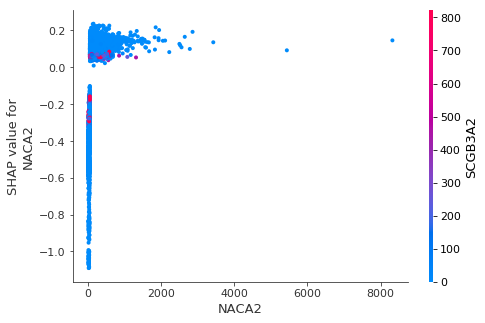

In [73]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("NACA2", shap_values, X)

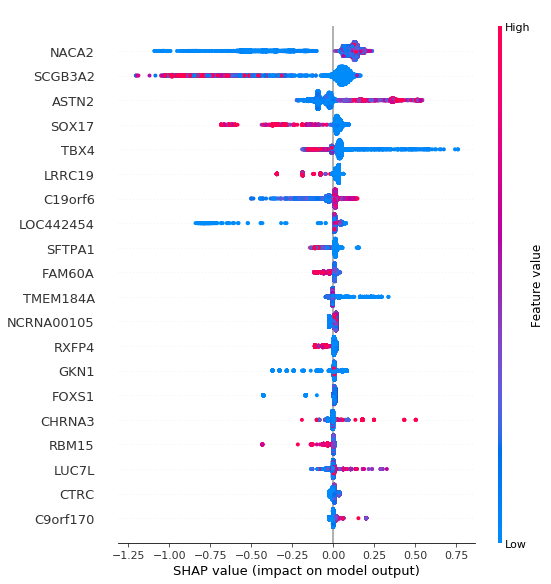

In [74]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X)

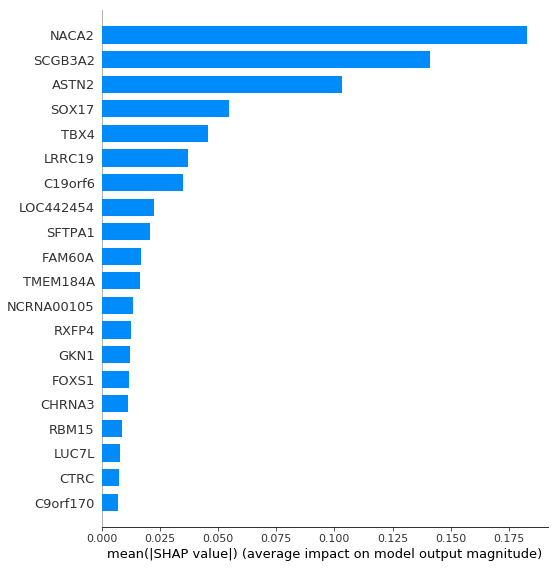

In [75]:
shap.summary_plot(shap_values, X, plot_type="bar")

In [60]:
# train XGBoost model
import sklearn
knnModel = sklearn.neighbors.KNeighborsClassifier()
knnModel.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [62]:
f = lambda x: knnModel.predict_proba(x)[:,1]
med = X.median().values.reshape((1,X.shape[1]))
explainer = shap.KernelExplainer(f, med)
shap_values_single = explainer.shap_values(X.iloc[0,:], nsamples=1000)

/usr/local/lib/python3.5/dist-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


In [ ]:
shap.summary_plot(shap_values, X_test_array, feature_names=vectorizer.get_feature_names())